<a href="https://colab.research.google.com/github/koalalovepabro/Deep-Learning/blob/main/Dogs_vs_Cats_keras__01_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
# 구글드라이브 서버연결
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Import Library

In [78]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("/content/gdrive/MyDrive/datasets/.kaggle"))

['test1', 'kaggle.json', 'train.zip', 'sampleSubmission.csv', 'test1.zip', 'train', 'Dogs vs Cats.ipynb', 'Dogs vs Cats_keras_#01-02.ipynb']


# Define Constants

In [3]:
FAST_RUN = False     # 아래에 사용..?
IMAGE_WIDTH = 128    # 이미지 넓이 (가로)
IMAGE_HEIGHT = 128   # 이미지 높이 (세로)
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3   # 이미지 depth (RGB)

# Prepare Training Data

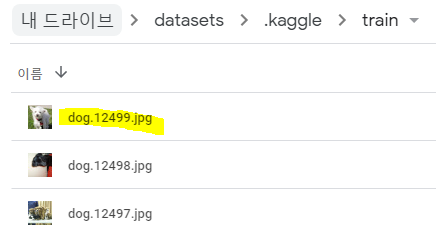

In [6]:
# os.listdir : 디렉터리 내에 있는 모든 파일 및 디렉터리 리스트를 가져와서 indexing
filenames = os.listdir("/content/gdrive/MyDrive/datasets/.kaggle/train")

# 빈 list를 한개 만든다
categories = []

# filenames에 있는 list들을 한개씩 받아온다.
for filename in filenames:
  # .으로 split하고 0번째에 있는 것을 category 변수에 저장 ( dog 또는 cat으로 저장될 것 )
  category = filename.split('.')[0]
  if category == 'dog':
    categories.append(1)  # 강아지면, categories 리스트에 1을 추가 ( OHE 효과 )
  else:
    categories.append(0)  # 강아지가 아니면 (고양이면), categories 리스트에 0을 추가 ( OHE 효과 )

# 데이터 프레임 만들기 - filename col에 filenames value 넣고, category col에 categories value 넣기
df = pd.DataFrame({
    'filename' : filenames,
    'category' : categories 
})


In [7]:
filenames

['cat.9076.jpg',
 'cat.9114.jpg',
 'cat.9082.jpg',
 'cat.909.jpg',
 'cat.9088.jpg',
 'cat.9078.jpg',
 'cat.9079.jpg',
 'cat.9100.jpg',
 'cat.91.jpg',
 'cat.9104.jpg',
 'cat.9095.jpg',
 'cat.9122.jpg',
 'cat.9119.jpg',
 'cat.9101.jpg',
 'cat.9071.jpg',
 'cat.9085.jpg',
 'cat.9116.jpg',
 'cat.9108.jpg',
 'cat.9115.jpg',
 'cat.9094.jpg',
 'cat.9105.jpg',
 'cat.9070.jpg',
 'cat.9077.jpg',
 'cat.9090.jpg',
 'cat.9091.jpg',
 'cat.9066.jpg',
 'cat.9107.jpg',
 'cat.9117.jpg',
 'cat.9073.jpg',
 'cat.9132.jpg',
 'cat.9176.jpg',
 'cat.9130.jpg',
 'cat.9134.jpg',
 'cat.9151.jpg',
 'cat.9139.jpg',
 'cat.9160.jpg',
 'cat.9147.jpg',
 'cat.916.jpg',
 'cat.9126.jpg',
 'cat.9129.jpg',
 'cat.9174.jpg',
 'cat.9149.jpg',
 'cat.9128.jpg',
 'cat.9135.jpg',
 'cat.9172.jpg',
 'cat.9141.jpg',
 'cat.9140.jpg',
 'cat.9142.jpg',
 'cat.913.jpg',
 'cat.9177.jpg',
 'cat.9155.jpg',
 'cat.914.jpg',
 'cat.9179.jpg',
 'cat.9148.jpg',
 'cat.9169.jpg',
 'cat.9164.jpg',
 'cat.9157.jpg',
 'cat.9175.jpg',
 'cat.9154.jpg',
 'c

In [8]:
len(filenames)  # 총 25,000개의 데이터가 있음을 확인

25000

In [9]:
df.head()      # filename별로 category가 잘 저장된 것을 확인

,filename,category
0,cat.9076.jpg,0
1,cat.9114.jpg,0
2,cat.9082.jpg,0
3,cat.909.jpg,0
4,cat.9088.jpg,0


In [10]:
df.tail()     # filename별로 category가 잘 저장된 것을 확인

,filename,category
24995,dog.10853.jpg,1
24996,dog.10900.jpg,1
24997,dog.10910.jpg,1
24998,dog.10903.jpg,1
24999,dog.10930.jpg,1


## See Total in Count

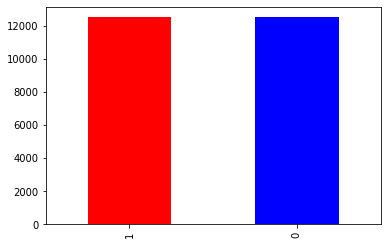

In [11]:
# df 데이터프레임에 있는 category col에 있는 value들을 count해서 bar plot 그리기
# 개와 고양이 데이터가 각 몇개인지 확인
df['category'].value_counts().plot.bar(color=['red', 'blue'])

In [12]:
df['category'].value_counts()

1    12500
0    12500
Name: category, dtype: int64

## See sample image

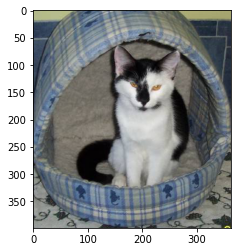

In [13]:
# random.choice를 사용하기 위해 위에서 import random을 사용
# 내가 가지고 있던 디렉터리에 있는 list 중에서 아무거나 1개 sampling
sample = random.choice(filenames)

# from keras.preprocessing.image import ImageDataGenerator , load_img를 쓴 이유
image = load_img("/content/gdrive/MyDrive/datasets/.kaggle/train/"+sample)
plt.imshow(image)

# Build Model

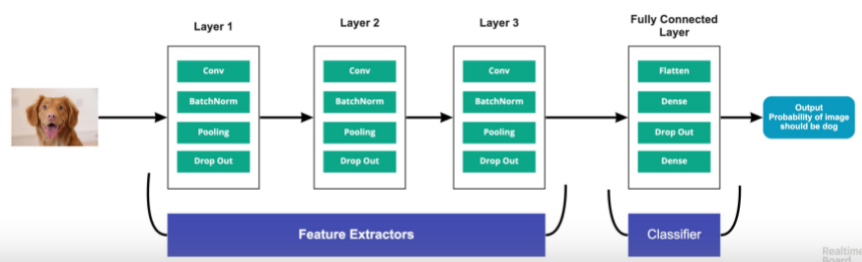

- **Input Layer :** It represent input image data. It will reshape image into single diminsion array.  
Example your image is 64x64 = 4096, it will convert to (4096,1) array.
- **Conv Layer:** This layer will extract features from image.
- **Pooling Layer:** This layer reduce the spatial volume of input image after convolution.
- **Fully Connected Layer:** It connect the network from a layer to another layer
- **Output Layer:** It is the predicted values layer.

In [14]:
from keras.models import Sequential  # sequential model은 layer를 선형으로 연결하여 구성한다.
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization  # keras.layers에서 pooling, dropout 등 CNN을 구성하는데 쓰이는 기법

model = Sequential()   # 가장 자주 사용하는 구조인, 층을 순서대로 쌓아 올린 네트워크. keras를 사용하여 모델을 정의(생성)

# Convolution
# 인공신경망 모델을 효율적으로 학습시키기 위한 개선 기법들 ( BatchNormalization, Dropout, ModelEnsemble )

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
'''
1. Conv2D에서 32는 필터의 수, (3,3)은 필터 사이즈
2. 활성화함수는 relu 사용
 *sigmoid가 아닌, relu를 사용하는 이유: 
  신경망이 깊어질수록 학습이 어렵기때문에 전체 계층을 한번 계산한 후 그 계산된 값을 다시 계산하는 역전파(Back Propagation)를 사용하는데,
  sigmoid를 활성화 함수로 사용할 경우, 계층이 깊어지면서 Gradient Vanishing ( 기울기 소실 ) 문제가 발생하기 때문 !!
3. 입력 이미지의 사이즈와 채널
4. 만들어진 모델은 입력 형태에 대한 정보가 필요하기에, Sequential model의 첫번째 layer는 입력 형태에 대한 정보를 받아야 한다.
5. 두 번째 이후의 layer들은 자동으로 형태를 추정할 수 있기때문에 input_shape을 쓸 필요가 없다.
6. input_shape에는 batch dimension은 포함되지 않는다. 
'''

model.add(BatchNormalization())           # 인공신경망에 입력값을 평균 0, 분산 1로 정규화해서 네트워크의 학습이 잘 되도록 함
model.add(MaxPooling2D(pool_size=(2,2)))  # 이미지 사이즈를 줄여주며, 좁은 부분을 자세히 (더 많이) 볼 수 있다.
model.add(Dropout(0.25))                  # 과적합을 방지하기 위해, activation을 0.25의 확률로 지워버림 ( 랜덤으로 노드 삭제 )

model.add(Conv2D(64, (3, 3), activation='relu'))    # 필터의 수 : 64
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation = 'relu'))  # 필터의 수 : 128
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Classifier
model.add(Flatten())    # 이 층에는 학습되는 가중치가 없고, 데이터를 변환하기만 한다 ( 1차원 vector로 변환 ) - 평탄화
model.add(Dense(512, activation='relu'))   # Dense로 층을 쌓음 ( 첫번째 Dense층은 512개의 노드를 가짐 )
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # 2: because we have cat and dog classes ( 만약 compile할때 loss에 binary_crossentropy로 설정했다면, 1이 되어야 함 )

# Compile ( 학습 과정 설정 )
model.compile(loss='categorical_crossentropy', # categorical_crossentropy : 손실함수, 가중치 텐서를 학습하기 위한 피드백 신호로 사용되며, 훈련하는 동안 최소화 됨.
                                               # 미니배치 확률적 경사 하강법을 톹ㅇ해 손실이 감소됨   
              
              optimizer='rmsprop',             # optimizer : 데이터와 손실 함수를 바탕으로, 모델의 업데이트 방법을 결정
                                               # rmsprop: 과거의 모든 기울기를 균일하게 더하지 않고, 새로운 기울기의 정보만 반영하도록 해서 학습률이 크게 떨어져 0에 가까워지는 것을 방지하는 방법
              
              metrics=['accuracy'])           


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

# Callbacks

In [16]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau  # 학습 조기 종료를 사용하기 위함

### Early Stop
To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

- 학습 횟수(epoch)가 많을수록 학습 데이터에 관한 오차는 작아지지만, 이것이 `overfitting`을 초래해서 모델의 "일반화" 성능이 떨어짐
- "이전 epoch 때와 비교해서 '오차가 증가했다면' 학습을 중단한다" 라는 방법인데, 

  **주의할점 :** 오차값은 각 epoch마다 올라가기도 하고 내려가기도 하며, Dropout을 적용한 경우에는 아직 학습이 되지 않은 뉴런이 존재할 가능성이 있기때문에 오차값이 상하로 움직이게 된다.
- 따라서 "어떤 일정한 epoch 수를 거듭하면서 계속해서 오차가 증가하면 학습을 중단한다"라는 방식으로 구현해야 함
- 아래의 예시를 보면, patience는 오차가 증가하는, 즉, "개선이 없는 epoch 수"가 patience에 지정된 수만큼 지속될 경우 학습을 종료시키기 위해 사용한다.
- 모델을 학습시키기 전에 다음과 같이 선언한다.
  - 그 다음 아래에 code를 보면 `model.fit()`이 있는데, `callbacks=early_stopping`을 사용하면 된다.
  - EarlyStopping은 callback 함수이다.
  - callback함수: 어떤 함수를 수행할 시, 그 함수에서 내가 지정한 함수를 호출하는 것
  - `earlystop = EarlyStopping(patience=10)` : 학습 조기종료를 뜻함 ->  
  overfitting을 막기위해서 10 epoch만큼 거슬러 올라가 볼때 "valication loss값이 감소하지 않으면, 학습을 중단하라"라는 의미.

In [17]:
# 학습 조기종료
earlystop = EarlyStopping(monitor='val_accuracy', patience=2)  # ★✨

In [18]:
earlystop

### Learn Rate Reduction
We will reduce the learning rate when then accuracy not increase for 2steps

In [19]:
# 학습률을 자동으로 감소시키기
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',    # ★✨
                                           patience=10,            # ★✨
                                           verbose=1,
                                           factor=0.5,  # 콜백이 호출될 때, 학습률을 50%로 줄임 (기존 학습룰 * 0.5)
                                           min_lr=0.00001
                                           )

- monitor : 관찰하고자 하는 항목입니다. ‘val_loss’나 ‘val_acc’가 주로 사용됩니다.  
-> ✨버전 바뀌면서 val_accuracy로 변경됨 !!
- min_delta : 개선되고 있다고 판단하기 위한 최소 변화량을 나타냅니다. 만약 변화량이 min_delta보다 적은 경우에는 개선이 없다고 판단합니다.
- patience : 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 줄 것인 가를 지정합니다. 만약 10이라고 지정하면 개선이 없는 에포크가 10번째 지속될 경우 학습일 종료합니다.
- verbose : 얼마나 자세하게 정보를 표시할 것인가를 지정합니다. (0, 1, 2)
- mode : 관찰 항목에 대해 개선이 없다고 판단하기 위한 기준을 지정합니다. 예를 들어 관찰 항목이 ‘val_loss’인 경우에는 감소되는 것이 멈출 때 종료되어야 하므로, ‘min’으로 설정됩니다.
  - auto : 관찰하는 이름에 따라 자동으로 지정합니다.
  - min : 관찰하고 있는 항목이 감소되는 것을 멈출 때 종료합니다.
  - max : 관찰하고 있는 항목이 증가되는 것을 멈출 때 종료합니다.

- 모델은 학습이 정체되면 학습 속도를 2~10배 감소시키는 '이점'이 있다.
- 이때, `ReduceLROnplateau`는 수량을 모니터링하며 patience 수의 epoch수가 '개선되지 않으면'(오차가 증가하면) 학습률이 감소한다.


In [20]:
callbacks = [earlystop, learning_rate_reduction]  # 학습 조기 종료 , 학습률 자동 감소

# Prepare data
Because we will use image genaretor with class_mode="categorical". We need to convert column category into string.  
Then imagenerator will convert it one-hot encoding which is good for our classification.

So we will convert 1 to dog and 0 to cat

In [21]:
# 0, 1로 OHE 했던 레이블 값을 다시 string으로 변환하기
df["category"] = df["category"].replace({0 : 'cat', 1 : 'dog'})

In [22]:
df.head()

,filename,category
0,cat.9076.jpg,cat
1,cat.9114.jpg,cat
2,cat.9082.jpg,cat
3,cat.909.jpg,cat
4,cat.9088.jpg,cat


In [23]:
# train & validation 데이터 분할
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)

# 인덱스 리셋 & drop=True : 인덱스로 셋팅한 열은 데이터 프레임에서 삭제
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [24]:
train_df.head()

,filename,category
0,dog.11159.jpg,dog
1,dog.11447.jpg,dog
2,cat.8236.jpg,cat
3,cat.1014.jpg,cat
4,cat.8656.jpg,cat


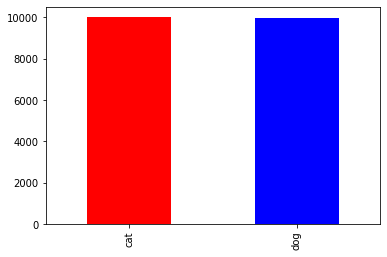

In [25]:
train_df['category'].value_counts().plot.bar(color=['red', 'blue'])

In [26]:
train_df['category'].value_counts()

cat    10014
dog     9986
Name: category, dtype: int64

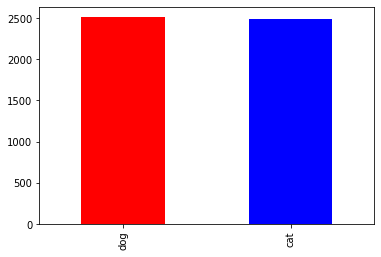

In [27]:
validate_df['category'].value_counts().plot.bar(color=['red', 'blue'])

In [28]:
validate_df['category'].value_counts()

dog    2514
cat    2486
Name: category, dtype: int64

dog : train + validate = 12,500  
cat : train + validate = 12,500

In [29]:
train_df.shape

(20000, 2)

In [30]:
validate_df.shape

(5000, 2)

In [31]:
total_train = train_df.shape[0]         # 20,000 개
total_validate = validate_df.shape[0]   #  5,000 개
batch_size = 15

## Training Generator

In [32]:
# 데이터 증식 ( overfitting 방지, 모델 성능 높이기 위함 ) ; Data Agumentation
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1./255,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

In [33]:
# dataframe과 디렉터리의 위치를 전달받아 증식/정규화 된 데이터의 "배치" 생성
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "/content/gdrive/MyDrive/datasets/.kaggle/train",
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size   # batch_size = 15
)

Found 20000 validated image filenames belonging to 2 classes.


**앞에서 데이터 분할한 것과 같이, train_df는 전체(25,000개)의 80%  :  20,000 개**

In [34]:
train_datagen

In [35]:
train_generator

## Validation Generator

In [36]:
# validation 데이터는 증식되면 안됨 !
validation_datagen = ImageDataGenerator(rescale=1./255)

In [37]:
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "/content/gdrive/MyDrive/datasets/.kaggle/train",
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size    # batch_size = 15
)

Found 5000 validated image filenames belonging to 2 classes.


**앞에서 데이터 분할한 것과 같이, validation_df는 전체(25,000개)의 20% : 5,000 개**

## See how our generator work

In [38]:
example_df = train_df.sample(n=1).reset_index(drop=True)  # train set인 train_df에서 1개를 sample로 뽑음

# 1개만 가지고 example_generator를 만듦

example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "/content/gdrive/MyDrive/datasets/.kaggle/train",
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical'
)  # sample 1개니까 batch는 안함

Found 1 validated image filenames belonging to 1 classes.


샘플 1개니까, 1개의 class에 속해있음

In [39]:
example_df   # sample로 뭐가 뽑혔는지 확인

,filename,category
0,dog.6628.jpg,dog


In [40]:
example_generator

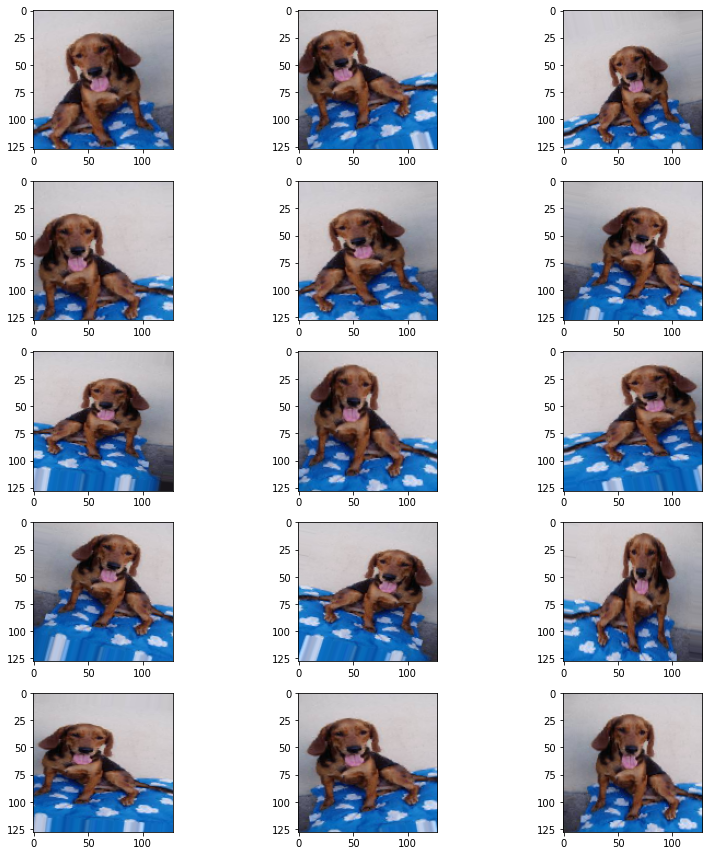

In [41]:
plt.figure(figsize = (12, 12))  # 그래프의 전체 윈도우 크기

for i in range(0, 15):
  plt.subplot(5, 3, i + 1)      # 5행 3열로 나누고, 위치는 i + 1

  for X_batch, Y_batch in example_generator:
    image = X_batch[0]
    plt.imshow(image)
    break

plt.tight_layout()      # 현재 figure상에서 배치되어 있는 놈들의 공백을 적당하게 잘 배치해주는 것. 여기서는 필수적으로 필요한 것은 아니다.
plt.show()

**15개의 이미지가 제각각 변형되어 증식된 것을 확인할 수 있다**

In [42]:
X_batch.shape

(1, 128, 128, 3)

In [43]:
X_batch

array([[[[0.6896028 , 0.68175966, 0.69352436],
         [0.6897036 , 0.68186045, 0.69362515],
         [0.6898044 , 0.68196124, 0.69372594],
         ...,
         [0.7840215 , 0.77617836, 0.78794307],
         [0.7856828 , 0.775965  , 0.7952285 ],
         [0.7834344 , 0.7716697 , 0.79912066]],

        [[0.6869579 , 0.67911476, 0.69087946],
         [0.6866556 , 0.67881244, 0.69057715],
         [0.68635327, 0.6785101 , 0.69027483],
         ...,
         [0.79917383, 0.7913307 , 0.8030954 ],
         [0.7942964 , 0.7844809 , 0.8041351 ],
         [0.79054654, 0.77878183, 0.8062328 ]],

        [[0.69762605, 0.6897829 , 0.7015476 ],
         [0.69732374, 0.6894806 , 0.70124537],
         [0.6970215 , 0.68917835, 0.70094305],
         ...,
         [0.79582715, 0.787984  , 0.7997487 ],
         [0.7916619 , 0.7817488 , 0.8017935 ],
         [0.789406  , 0.7776413 , 0.8050923 ]],

        ...,

        [[0.20581658, 0.20384265, 0.2214941 ],
         [0.20732813, 0.20565648, 0.22320716]

In [44]:
X_batch[0]

array([[[0.6896028 , 0.68175966, 0.69352436],
        [0.6897036 , 0.68186045, 0.69362515],
        [0.6898044 , 0.68196124, 0.69372594],
        ...,
        [0.7840215 , 0.77617836, 0.78794307],
        [0.7856828 , 0.775965  , 0.7952285 ],
        [0.7834344 , 0.7716697 , 0.79912066]],

       [[0.6869579 , 0.67911476, 0.69087946],
        [0.6866556 , 0.67881244, 0.69057715],
        [0.68635327, 0.6785101 , 0.69027483],
        ...,
        [0.79917383, 0.7913307 , 0.8030954 ],
        [0.7942964 , 0.7844809 , 0.8041351 ],
        [0.79054654, 0.77878183, 0.8062328 ]],

       [[0.69762605, 0.6897829 , 0.7015476 ],
        [0.69732374, 0.6894806 , 0.70124537],
        [0.6970215 , 0.68917835, 0.70094305],
        ...,
        [0.79582715, 0.787984  , 0.7997487 ],
        [0.7916619 , 0.7817488 , 0.8017935 ],
        [0.789406  , 0.7776413 , 0.8050923 ]],

       ...,

       [[0.20581658, 0.20384265, 0.2214941 ],
        [0.20732813, 0.20565648, 0.22320716],
        [0.20169236, 0

In [45]:
X_batch[0, 1]   # 0번째 데이터의 1번째 행

array([[0.6869579 , 0.67911476, 0.69087946],
       [0.6866556 , 0.67881244, 0.69057715],
       [0.68635327, 0.6785101 , 0.69027483],
       [0.6863491 , 0.67850596, 0.69027066],
       [0.6864499 , 0.67860675, 0.69037145],
       [0.6916173 , 0.6837741 , 0.6955389 ],
       [0.7121434 , 0.7043003 , 0.716065  ],
       [0.708774  , 0.70093083, 0.71269554],
       [0.7049493 , 0.6971062 , 0.7088709 ],
       [0.73074424, 0.7229011 , 0.7346658 ],
       [0.72321266, 0.7153695 , 0.7271342 ],
       [0.7246463 , 0.71680313, 0.72856784],
       [0.72834754, 0.7205044 , 0.7322691 ],
       [0.72935593, 0.7215128 , 0.7332775 ],
       [0.73552513, 0.727682  , 0.7394467 ],
       [0.73945117, 0.73160803, 0.74337274],
       [0.74651283, 0.7386697 , 0.7504344 ],
       [0.7507753 , 0.74293214, 0.75469685],
       [0.7544764 , 0.7466333 , 0.758398  ],
       [0.7444602 , 0.7366171 , 0.7483818 ],
       [0.7469408 , 0.73909765, 0.75086236],
       [0.75454485, 0.7467017 , 0.7584664 ],
       [0.

In [46]:
X_batch[0, 1, 0]

array([0.6869579 , 0.67911476, 0.69087946], dtype=float32)

In [47]:
Y_batch.shape

(1, 1)

In [48]:
Y_batch

array([[1.]], dtype=float32)

In [49]:
Y_batch[0]

array([1.], dtype=float32)

In [50]:
Y_batch[0, 0]

1.0

In [51]:
print(Y_batch)

[[1.]]


# Fit Model

#### **학습 조기종료 조건** ★✨
`earlystop = EarlyStopping(monitor='val_accuracy', patience=2)`  
2 epoch만큼 거슬러 올라가 볼때 `valication accuracy`가 증가하지 않으면, 학습 중단


#### **학습률 자동감소 조건** ★✨
`learning_rate_reduction = ReduceLROnPlateau  
(monitor='val_loss',  
                                           patience=10,  
                                           verbose=1,  
                                           factor=0.5,  
                                           min_lr=0.00001  
                                           )`
                                        
`val_loss`가 10번 연속 낮아지지 않으면(증가하면), 바로 학습률 감소 !

In [52]:
epochs = 3 if FAST_RUN else 50

history = model.fit(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_validate//batch_size,   # 1,333.33 => total_validate = 20,000개, batch_size = 15
    steps_per_epoch = total_train//batch_size,       # 333.33 => total_train = 5,000개, batch_size = 15
    callbacks = callbacks
)

Epoch 1/50
1333/1333 [==============================] - 4431s 3s/step - loss: 0.9971 - accuracy: 0.5890 - val_loss: 0.6622 - val_accuracy: 0.6571
Epoch 2/50
1333/1333 [==============================] - 153s 115ms/step - loss: 0.5685 - accuracy: 0.7131 - val_loss: 0.8355 - val_accuracy: 0.6749
Epoch 3/50
1333/1333 [==============================] - 155s 116ms/step - loss: 0.5108 - accuracy: 0.7496 - val_loss: 0.6858 - val_accuracy: 0.7275
Epoch 4/50
1333/1333 [==============================] - 153s 115ms/step - loss: 0.4763 - accuracy: 0.7788 - val_loss: 0.5258 - val_accuracy: 0.7952
Epoch 5/50
1333/1333 [==============================] - 153s 115ms/step - loss: 0.4441 - accuracy: 0.8006 - val_loss: 0.6593 - val_accuracy: 0.7441
Epoch 6/50
1333/1333 [==============================] - 154s 115ms/step - loss: 0.4210 - accuracy: 0.8100 - val_loss: 0.4513 - val_accuracy: 0.7920


# Save Model

In [53]:
model.save_weights("model.h5")

# Virtualize Training

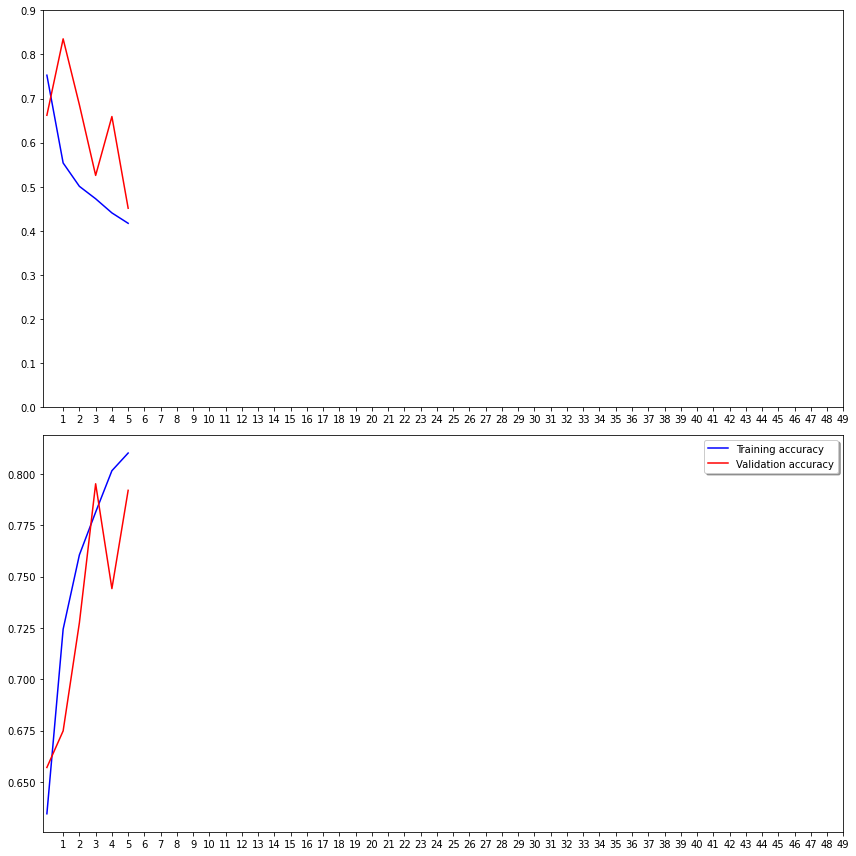

In [54]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize= (12, 12))

ax1.plot(history.history['loss'], color='b', label='Training loss')
ax1.plot(history.history['val_loss'], color='r', label='Validation loss')
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label='Training accuracy')   # 'acc' -> 'accuracy'
ax2.plot(history.history['val_accuracy'], color='r', label='Validation accuracy')
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Prepare Testing Data


In [55]:
test_filenames = os.listdir('/content/gdrive/MyDrive/datasets/.kaggle/test1')
test_df = pd.DataFrame({
    'filename' : test_filenames
})
nb_samples = test_df.shape[0]  # test dataset 개수

In [56]:
test_df.shape

(12500, 1)

# Create Testing Generator

In [57]:
# test 데이터는 증식되면 안됨 ! 
test_gen = ImageDataGenerator(rescale = 1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "/content/gdrive/MyDrive/datasets/.kaggle/test1",
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,  # batch_size = 15
    shuffle = False
)

Found 12500 validated image filenames.


# Predict

In [58]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size)) # model.predict_generator -> model.predict
# -np.ceil(data) : 소수점 자리 수를 '올림'해서 정수로 만들어줌
# nb_samples : test dataset의 갯수
# batch_size = 15

In [59]:
predict

array([[0.8636884 , 0.13631162],
       [0.25755158, 0.74244845],
       [0.40630442, 0.5936956 ],
       ...,
       [0.5996329 , 0.40036708],
       [0.30017957, 0.6998204 ],
       [0.40874803, 0.5912519 ]], dtype=float32)

In [60]:
test_df

,filename
0,11497.jpg
1,11469.jpg
2,11536.jpg
3,11507.jpg
4,11557.jpg
...,...
12495,502.jpg
12496,515.jpg
12497,510.jpg
12498,552.jpg


In [61]:
np.argmax(predict, axis=-1)

array([0, 1, 1, ..., 0, 1, 1])

For categoral classication the prediction will come with probability of each category.  
So we will pick the category that have the highest probability with numpy average max.


In [62]:
# axis = -1 에서 가장 큰 값의 인덱스를 반환 ( 여기에서는 0과 1 중 큰 값인 1을 가진 인덱스를 반환함)
# 1 = dog
test_df['category'] = np.argmax( predict, axis= -1 )

In [63]:
test_df['category']

0        0
1        1
2        1
3        1
4        0
        ..
12495    0
12496    0
12497    0
12498    1
12499    1
Name: category, Length: 12500, dtype: int64

We will convert the predict category back into our generator classes by using `train_generator.class_indices.`  
It is the classes that image generator map while converting data into computer vision.


In [64]:
test_df

,filename,category
0,11497.jpg,0
1,11469.jpg,1
2,11536.jpg,1
3,11507.jpg,1
4,11557.jpg,0
...,...,...
12495,502.jpg,0
12496,515.jpg,0
12497,510.jpg,0
12498,552.jpg,1


In [65]:
label_map = dict((v, k) for k, v in train_generator.class_indices.items())

# category를 1, 0 ->  dog, cat으로 변환
test_df['category'] = test_df['category'].replace(label_map)

From our prepare data part. We map data with `{1: 'dog', 0: 'cat'}`.  
Now we will map the result back to dog is 1 and cat is 0

In [66]:
test_df

,filename,category
0,11497.jpg,cat
1,11469.jpg,dog
2,11536.jpg,dog
3,11507.jpg,dog
4,11557.jpg,cat
...,...,...
12495,502.jpg,cat
12496,515.jpg,cat
12497,510.jpg,cat
12498,552.jpg,dog


In [67]:
# category를 dog, cat -> 1, 0 으로 변환
test_df['category'] = test_df['category'].replace({ 'dog' : 1 , 'cat' : 0 })

In [68]:
test_df

,filename,category
0,11497.jpg,0
1,11469.jpg,1
2,11536.jpg,1
3,11507.jpg,1
4,11557.jpg,0
...,...,...
12495,502.jpg,0
12496,515.jpg,0
12497,510.jpg,0
12498,552.jpg,1


#### Virtualize Result

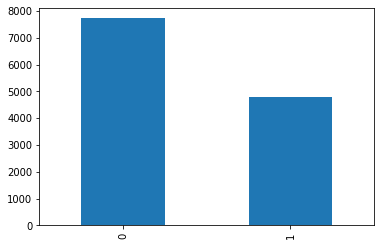

In [69]:
test_df['category'].value_counts().plot.bar()

In [72]:
test_df['category'].value_counts()

0    7726
1    4774
Name: category, dtype: int64

#### See predicted result with images

In [73]:
sample_test = test_df.head(18)
sample_test.head()

,filename,category
0,11497.jpg,0
1,11469.jpg,1
2,11536.jpg,1
3,11507.jpg,1
4,11557.jpg,0


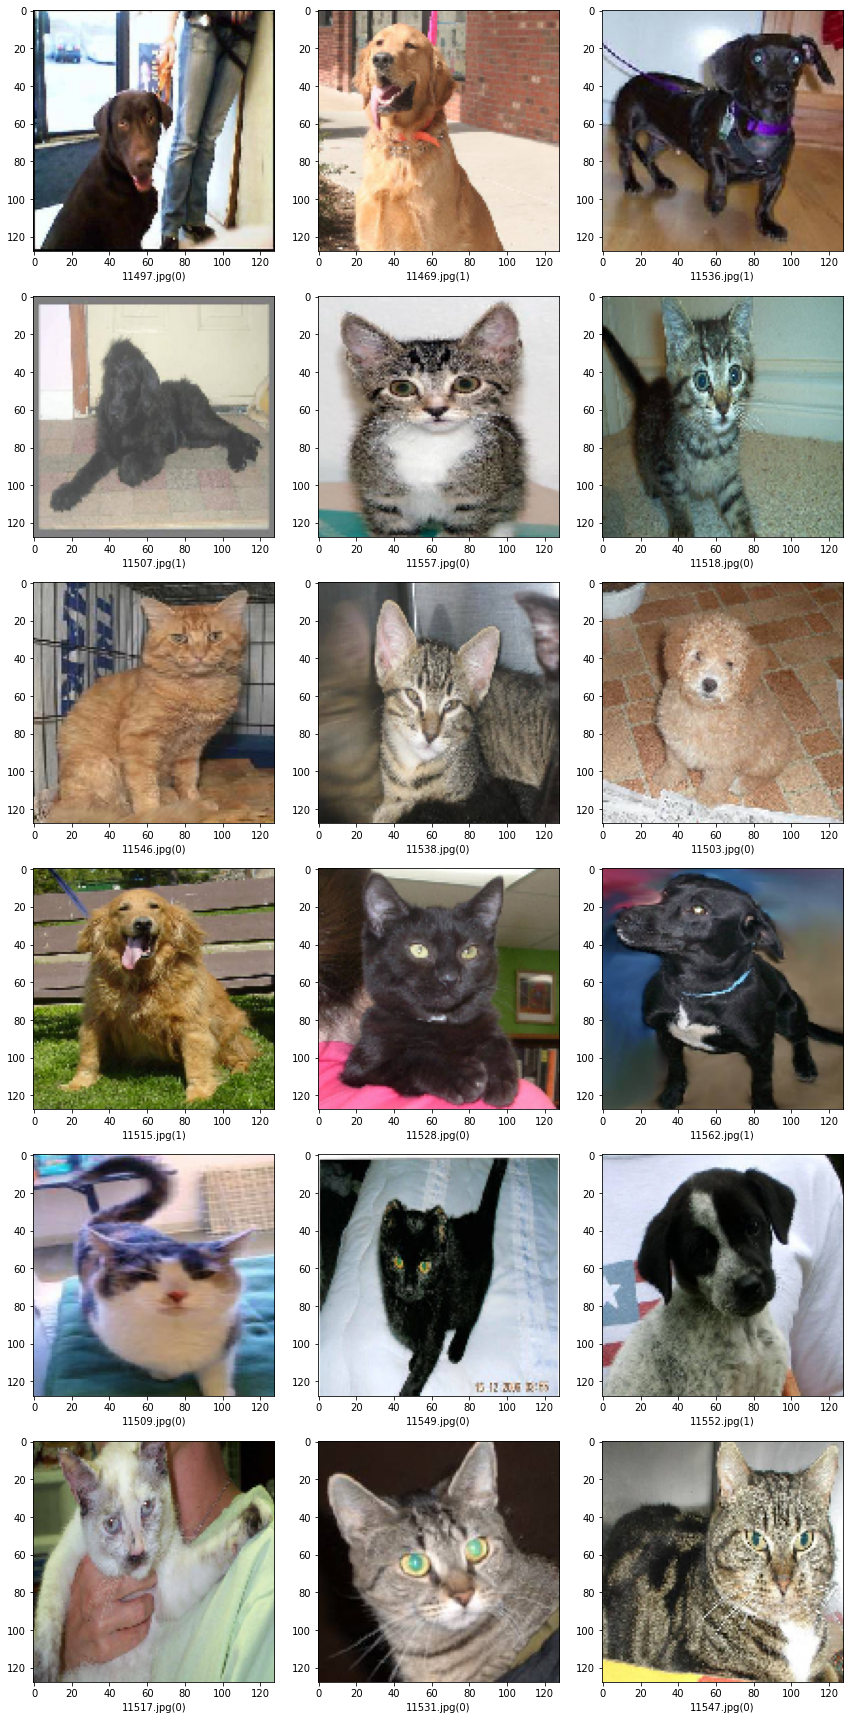

In [80]:
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
  filename = row['filename']   # filename = 칼럼명 filename의 값들이 1개의 행으로 나열된 형태
  category = row['category']   # category = 칼럼명 category의 값들이 1개의 행으로 나열된 형태
  img = load_img("/content/gdrive/MyDrive/datasets/.kaggle/test1/"+filename, target_size=IMAGE_SIZE)
  plt.subplot(6, 3, index+1)
  plt.imshow(img)
  plt.xlabel(filename + '(' + "{}".format(category) + ')' )

plt.tight_layout()  # 자동으로 레이아웃을 맞춰주는 함수 (여백을 알아서 맞춰줌)
plt.show()

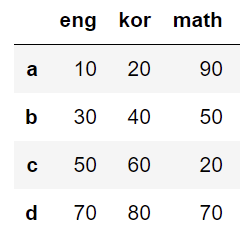

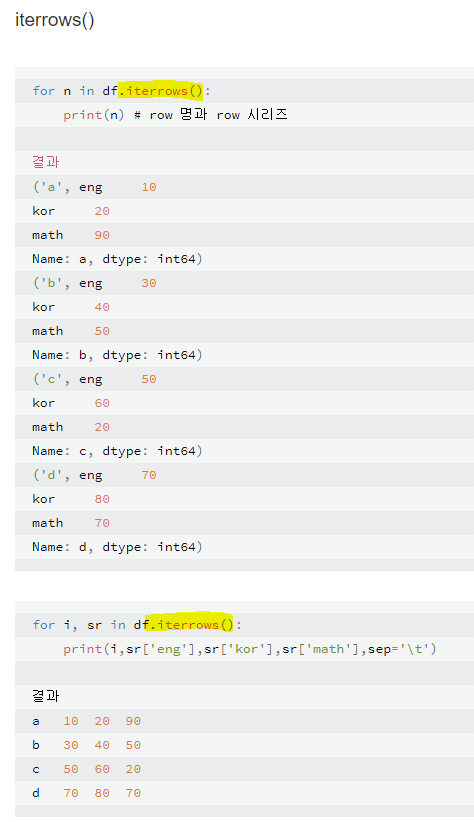

# Submission

In [81]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)

# Try



#### **학습 조기종료 조건** ★✨
`earlystop = EarlyStopping(monitor='val_loss', patience=10)`  
-> `earlystop = EarlyStopping(monitor='val_accuracy', patience=2)`  
2 epoch만큼 거슬러 올라가 볼때 `valication accuracy`가 증가하지 않으면, 학습 중단

**학습 조기종료 조건을 val_loss에서 val_accuracy로 변경 + patience를 10에서 2로 변경**  


#### **학습률 자동감소 조건** ★✨
`learning_rate_reduction = ReduceLROnPlateau  
(monitor='val_accuracy',  
                                           patience=2,  
                                           verbose=1,  
                                           factor=0.5,  
                                           min_lr=0.00001  
                                           )`
-> `learning_rate_reduction = ReduceLROnPlateau  
(monitor='val_loss',  
                                           patience=10,  
                                           verbose=1,  
                                           factor=0.5,  
                                           min_lr=0.00001  
                                           )`
                                        
`val_loss`가 10번 연속 낮아지지 않으면(증가하면), 바로 학습률 감소 !

**학습률 자동감소 조건을 val_accuracy에서 val_loss로 변경 + patience를 2에서 10으로 변경**

#### **각 조건을 변경한 이유**
케라스 창시자에게 배우는 딥러닝 교재의 콜백 설명 부분에서 (p.331) ReduceLROnPlateau 콜백을 사용하면 검증손실(val_loss)이 향상되지 않을 때 학습률을 작게 할 수 있다고 나와있어서, 캐글에 올라온 코드와 반대되는 내용이라 모델링 결과가 어떻게 달라지는지 궁금해서 변경 해 보았다.


# 결과
기존 코드 val_loss: 0.2044 , val_accuracy: 0.9171 , epoch : 36/50  
변경 코드 val_loss: 0.4513 , val_accuracy: 0.7952 , epoch : 6/50  

=> 변경 전의 accuracy가 더 높다 ( 모델 성능이 더 좋다 )